## Background

For the EDA, we analyzed unemployment data from Federal Reserve Economic Data (FRED) using the Quandl API. We cleaned our dataset and the final dataset has 577 rows and 18 columns.

We created a python function to make repeated API calls and the argument passed is a code for each demographic group. We further performed API calls for our demographic groups of interest.

The visualizations includce a Time series plots to showcase the following relationships: Overall unemployment rate, unemployment rate by gender, Race/Ethnic group, age and highest level of aducation.

The script allows us to save both a CSV of all data retrieved and png images for each time series plots.

#### Dependencies and Setup

In [ ]:
# Importing dependencies

import pandas as pd
import numpy as np
import requests
import time

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

We chose to analyze unemployment data from the Federal Reserve Economic Data (FRED).
We accessed the information using an API key from Quandl.

In [ ]:
# Establishing the API call to retrieve raw data
# We are starting builing our dataframe using the "civilian" unemployment
# rate as a baseline or reference for the later analysis.

API_KEY = 'awTwUK4ZMRjByCcPCNsQ'
url = 'https://www.quandl.com/api/v3/datasets/FRED/UNRATE.json?api_key='+ API_KEY
req = requests.get(url).json()
req


In [ ]:
#Looking at results of the first API call and and creating a pandas dataframe

demographic = req['dataset']['name']
unemp_rate = req['dataset']['data']
#unemp_rate
civilian = pd.DataFrame(unemp_rate,columns=['date' , demographic]) # converting list to df
civilian


In [ ]:
# Each API call results in one series. We are interested in examining a set of 
# series representing demographic groups. Therefore, we created a function to
# make repeated API calls and the argument passed is a code for each demographic
# group. 

def my_func(a= 'dataset_code'):
    
    API_KEY = 'awTwUK4ZMRjByCcPCNsQ'
    url = 'https://www.quandl.com/api/v3/datasets/FRED/'+a+'.json?api+key='+API_KEY
    req = requests.get(url).json()
    # print(response) to check results
    demographic = req['dataset']['name']
    unemp_rate = req['dataset']['data']
    df = pd.DataFrame(unemp_rate,columns=['date' , demographic])
    return df

# Making the API calls for our demographic groups of interest.

The first set of API calls is for race/ethnic groups.

NOTE: Because the API calls are slow, please execute API call cells one at a time, so that the program does not 
halt.

In [ ]:
#TANISHA THIS IS DIFFERENT FROM THE LAST NOTEBOOK:
# civilian = pd.DataFrame(unemp_rate,columns=['date' , demographic]) # converting list to df
#civilian = my_func(a = 'UNRATE')
#time.sleep(1.01)
#civilian

In [ ]:
# We use the time.sleep() method to delay the API calls when we are making several of them. 

white = my_func(a = 'LNS14000003')
time.sleep(1.01)
white

In [ ]:
hispanic = my_func(a = 'LNS14000009')
time.sleep(1.01)
hispanic

In [ ]:
asian = my_func(a= 'LNU04032183')
time.sleep(1.01)
asian

In [ ]:
african = my_func(a='LNS14000006')
time.sleep(1.01)
african

This group of API calls is for gender demographic groups:

In [ ]:
men = my_func(a= 'LNS14000001')
time.sleep(1.01)
men

In [ ]:
women= my_func(a= 'LNS14000002')
time.sleep(1.01)
women

This group of API calls is for age groups, where age_1 is <25, age_2 is 25-34, age_3 is 35-44, age_4 is 45-54, age_5 is 55 and above:

In [ ]:
age_1 = my_func(a= 'LNS14000036')
time.sleep(1.01)
age_1

In [ ]:
age_2 = my_func(a= 'LNS14000089')
time.sleep(1.01)
age_2

In [ ]:
age_3 = my_func(a= 'LNS14000091')
time.sleep(1.01)
age_3

In [ ]:
age_4= my_func(a= 'LNS14000093')
time.sleep(1.01)
age_4

In [ ]:
age_5= my_func(a= 'LNS14024230')
time.sleep(1.01)
age_5

This group of API calls is for highest education level, where edu_1 is did not complete high school, edu_2 is high school diploma, edu_3 is  bachelors degree, edu_4 is masters degree, edu_5 is PhD.

In [ ]:
edu_1 = my_func(a= 'LNS14027659')
time.sleep(1.01)
edu_1

In [ ]:
edu_2 = my_func(a= 'LNS14027660')
time.sleep(1.01)
edu_2

In [ ]:
edu_3 = my_func(a= 'LNS14027662')
time.sleep(1.01)
edu_3

In [ ]:
edu_4 = my_func(a= 'CGMD25O')
time.sleep(1.01)
edu_4

In [ ]:
edu_5 = my_func(a= 'CGDD25O')
time.sleep(1.01)
edu_5


## Creating the dataframe

In [ ]:
# Creating the larger master dataframe by peforming an outer merge on the 
# common column 'date'. Naming convention
# is race1_df, second merge is race2_df, etc. Future merged dataframes will follow 
# this convention based on the name of the demographic group.

race1_df  = pd.merge(civilian,white,how='outer', on='date')
#race1_df
race2_df=pd.merge(race1_df,hispanic, how='outer', on='date')
race3_df=pd.merge(race2_df,african,how='outer', on='date')
#race3_df
race_df=pd.merge(race3_df,asian,how='outer', on='date')
#printing the final subdataframe "race"
race_df

In [ ]:
#Creating the gender subdataframe, and printing it to check results

gender_df= pd.merge(men,women,how='outer',on='date')
gender_df

In [ ]:
#Creating the age category subdataframe, and printing to check results.

age1_df = pd.merge(age_1, age_2, how='outer',on='date')
age2_df = pd.merge(age1_df, age_3, how='outer',on='date')
age3_df=pd.merge(age2_df, age_4,how='outer',on='date')
age_df = pd.merge(age3_df, age_5,how='outer',on='date')
age_df


In [ ]:
#Creating the education sub dataframe, and printing the results.

edu1_df = pd.merge(edu_1, edu_2, on='date', how='outer')
edu2_df = pd.merge(edu1_df, edu_3, on='date',how='outer')
edu3_df = pd.merge(edu2_df, edu_4, on='date',how='outer')
edu_df=pd.merge(edu3_df, edu_5, on='date',how='outer')
edu_df


In [ ]:
# Creating the master dataframe from the sub dataframes.

master1_df=pd.merge(race_df,gender_df, how='outer',on='date')
master2_df=pd.merge(master1_df,age_df,how='outer',on='date')
unemployment=pd.merge(master2_df, edu_df, how = 'outer', on='date')
unemployment

## Wrangling the dataframe

In [ ]:
# We are interested in only using the part of the data frame that has no null 
# values, so we need to find out where the are.
# We've had issues with repeated API calls, so we're going to create a
# working dataframe from our saved .csv file
#unemployment = pd.read_csv('unemployment.csv')


# Creating a .csv version of the df for anyone who wants it.
#unemployment_df.to_csv('unemployment.csv')

#unemployment_df.head(20)
#unemployment.columns
#unemployment.drop(columns = ['Unnamed: 0'], inplace = True)
# Renaming columns
unemployment.columns = ['Date', 'Civilian','White', 'Hispanic/Latinx','Black/AA', 'Asian', 'Men', 'Women', '20-24','25-34','35-44',
                           '45-54', '>55','Less_than_HS', 'HS', 'College', 'Masters', 'PhD']
unemployment.columns
unemployment.head()

In [ ]:
# Changing date datatype to datetime
unemployment['Date']=pd.to_datetime(unemployment['Date'])
unemployment.head()


In [ ]:
#unemployment_df.dtypes
unemployment['Year']=unemployment['Date'].dt.year
unemployment.head()


In [ ]:
#unemployment.drop(unemployment.index[577:879], inplace = True)

# Sorting by index so that our time series runs forwards in time
unemployment.sort_values(by = ['Date'], inplace = True)
unemployment.head()

In [ ]:
# Resetting 'Date' as the index:
unemployment.set_index('Date', inplace = True)
unemployment.head()

In [77]:
# Saving the dataframe to csv file
unemployment.to_csv('unemployment.csv')

## Inspecting the dataframe

In [78]:
unemployment.shape

(577, 18)

In [ ]:
unemployment.info()

In [80]:
unemployment.describe().round(1)

,Civilian,White,Hispanic/Latinx,Black/AA,Asian,Men,Women,20-24,25-34,35-44,45-54,>55,Less_than_HS,HS,College,Masters,PhD,Year
count,577.0,577.0,577.0,577.0,255.0,577.0,577.0,577.0,577.0,577.0,577.0,577.0,351.0,351.0,351.0,255.0,255.0,577.0
mean,6.3,5.5,8.8,11.8,4.9,6.3,6.3,10.3,6.2,4.7,4.2,4.0,9.0,5.7,2.8,2.7,1.8,1996.7
std,1.7,1.6,2.5,3.1,2.0,1.8,1.7,2.5,1.8,1.4,1.4,1.3,2.8,2.1,1.0,0.9,0.7,13.9
min,3.5,3.0,4.0,5.2,2.0,3.5,3.3,5.9,3.5,2.4,2.1,2.3,5.0,3.2,1.5,1.0,0.3,1973.0
25%,5.0,4.4,6.8,9.5,3.4,4.9,5.1,8.5,4.9,3.7,3.2,3.1,7.1,4.3,2.1,2.0,1.4,1985.0
50%,5.9,5.1,8.6,11.6,4.2,5.8,6.0,9.7,5.8,4.4,3.8,3.7,8.4,5.0,2.5,2.6,1.7,1997.0
75%,7.4,6.5,10.5,14.2,6.0,7.3,7.6,11.5,7.1,5.3,4.8,4.5,10.6,6.5,3.2,3.3,2.1,2009.0
max,14.8,14.1,18.9,21.2,14.8,13.6,16.1,25.6,14.6,11.5,12.3,13.6,21.0,17.3,8.4,6.7,4.5,2021.0


# Unemployment Rate Data Analysis

For historical context, here is a time series display of the unemployment rates, including the overall
civilian unemployment rate, which we use as a baseline reference. These records begin at 1973; at that 
time, the Bureau of Labor Statistics was collecting unemployment data on a limited set of demographic 
groups. These were later expanded to include a broader set of races/ethnic groups, and education
levels. In the COVID example below, we we will disagregate the unemployment rates across demographic 
groups. 


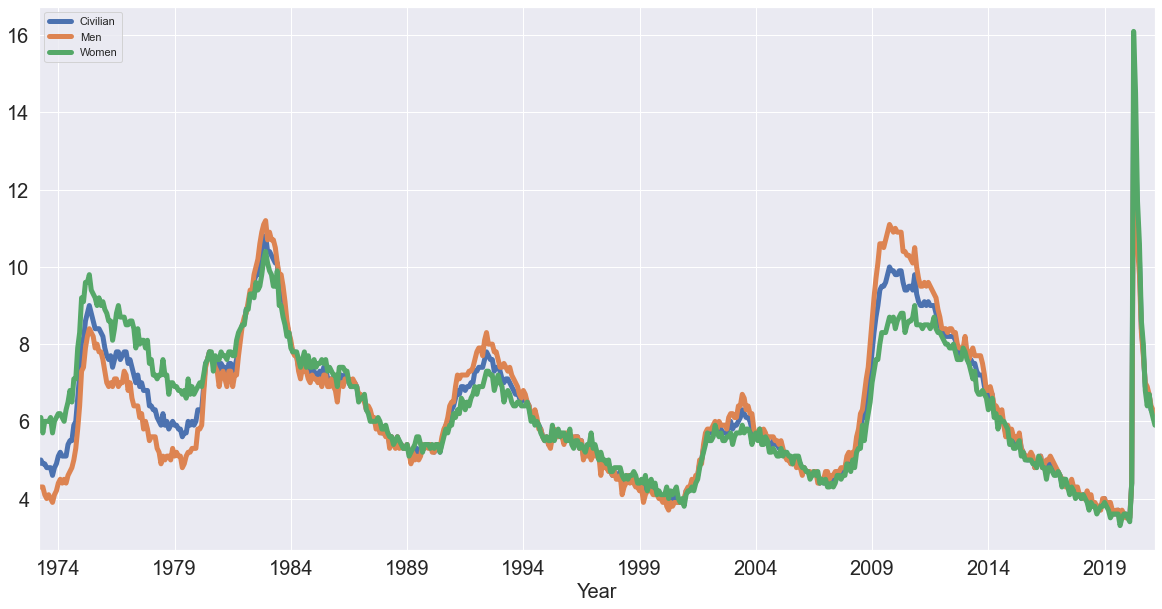

In [81]:
unemployment[['Civilian', 'Men','Women', ]].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

# Investigating unemployment rates: the COVID years

We are interested in looking at how the unemployment rates changed during the COVID pandemic. We want to plot a time series beginning at October 1, 2019, so that we have one fiscal year's data prior to the beginning of the pandemic as a reference. We begin by creating the COVID dataframe from the master unemployment dataframe csv file.

In [83]:
# Create COVID dataframe by reading .csv 
COVID_df = pd.read_csv('unemployment.csv')
COVID_df.head()

,Date,Civilian,White,Hispanic/Latinx,Black/AA,Asian,Men,Women,20-24,25-34,35-44,45-54,>55,Less_than_HS,HS,College,Masters,PhD,Year
0,1973-03-01,4.9,4.4,7.3,9.4,NaN,4.3,6.0,7.8,4.3,2.9,2.7,2.6,NaN,NaN,NaN,NaN,NaN,1973
1,1973-04-01,5.0,4.5,7.9,9.9,NaN,4.3,6.1,8.0,4.2,2.7,2.8,2.5,NaN,NaN,NaN,NaN,NaN,1973
2,1973-05-01,4.9,4.3,8.1,9.6,NaN,4.3,5.7,7.8,4.5,2.7,2.3,2.5,NaN,NaN,NaN,NaN,NaN,1973
3,1973-06-01,4.9,4.3,7.9,9.8,NaN,4.1,6.0,8.0,4.5,2.7,2.5,2.6,NaN,NaN,NaN,NaN,NaN,1973
4,1973-07-01,4.8,4.2,7.2,9.8,NaN,4.0,6.0,8.1,4.2,2.5,2.3,2.8,NaN,NaN,NaN,NaN,NaN,1973


In [105]:
# Now, we have to restrict the dataframe to the years of interest. We want to drop rows but we need to know
#the indices for the dates, so we will use a filter, commented out below.

start_date = "2018-09-01"
end_date= "2021-03-01"

mask = (COVID_df['Date'] > start_date) & (COVID_df['Date'] <= end_date)
COVID = COVID_df.loc[mask]

In [ ]:
COVID.set_index('Date', inplace=True)
COVID

### COVID Unemployment Rate:Breakdown by Gender

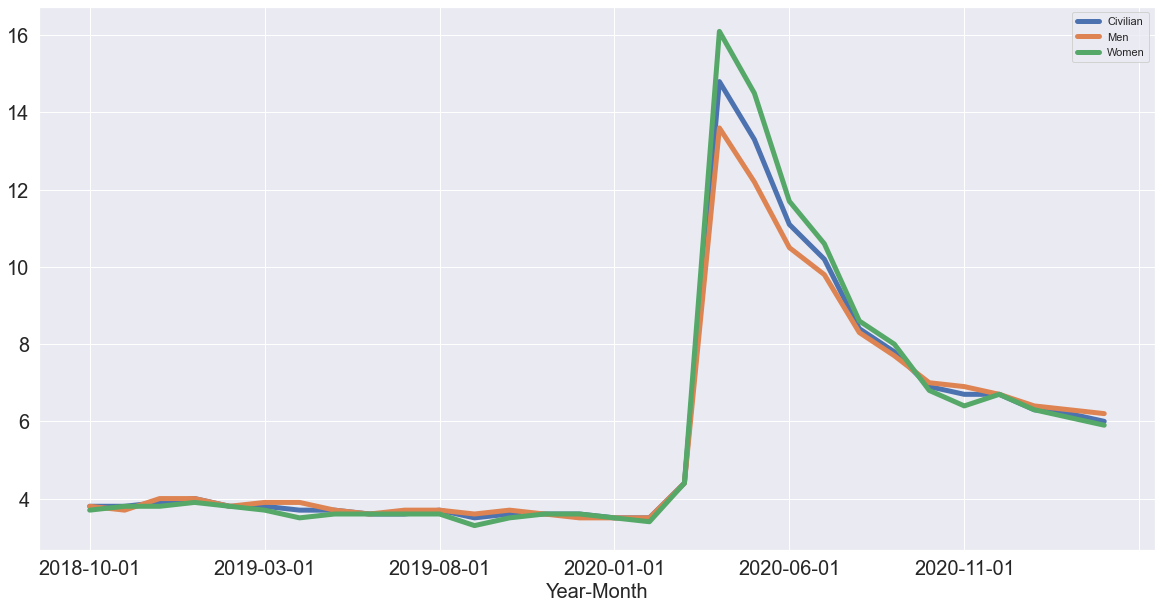

In [100]:
# Breaking down the unemployment rate by gender:
COVID[['Civilian','Men','Women']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year-Month', fontsize=20)
plt.show()

The first time series displays the overall, or "Civilian", unemployment rate in blue. We also show how this is decomposed into unemployment rates by gender. In green is the women's unemployment rate; the men's is in orange. This display clearly shows that for the peak of unemployment claims filed (April, 2020), unemployment was higher for women (16.1%) than for men (about 13.6%), a difference of 2.5%. The unemployment rates decreased at about the same rate; by September 2020, the gap between genders for unemployment all but disappeared. The current rate of unemployment seems to have leveled off to about 6%, with the men's rate (6.2) being slightly higher than the women's (5.9). This "new normal" is still 3% points {#CHECK NUMBERS} higher than it was before the pandemic began. 

### COVID Unemployment Rate:Breakdown by Race/Ethnic Group

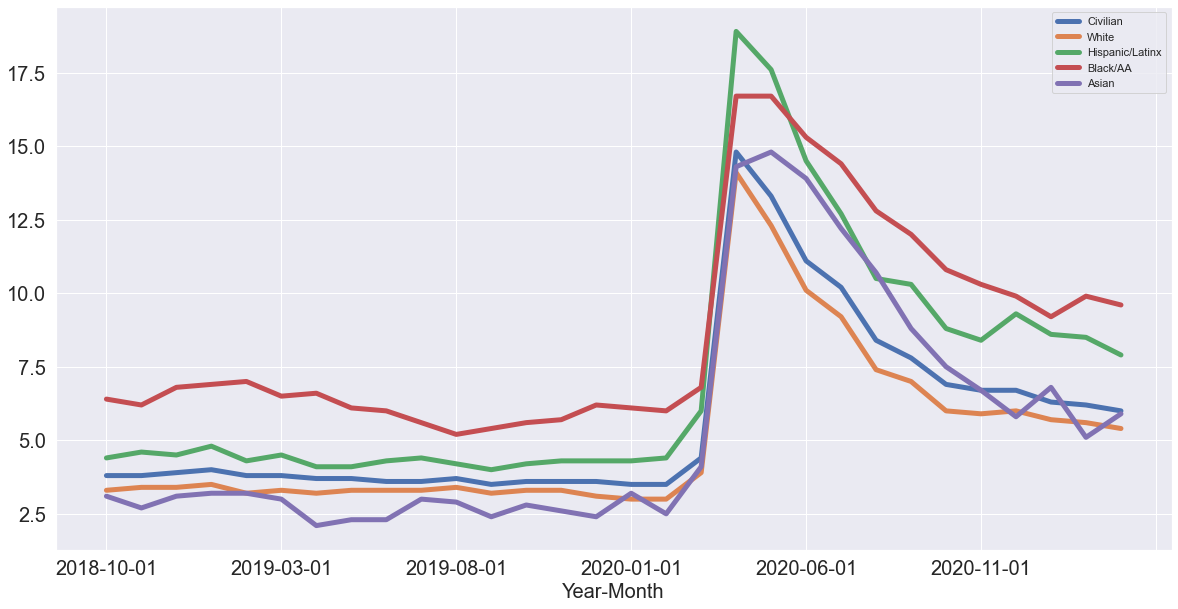

In [101]:
# Breaking down the unemployment rate by race:
COVID[['Civilian','White','Hispanic/Latinx','Black/AA','Asian']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year-Month', fontsize=20)
plt.show()

This next time series displays the unemployment rates disaggregated by race/ethnic groups. Again, the reference Civilian rate is in blue. At the peak of unemployment (14.8%), Hispanic/Latinx had the highest rate (18.9%), followed by Black/African American (16.7). Asians (14.3%) were almost tied with Whites (14.1%). Almost one year after the pandemic, unemployment rates have decreased for all groups, yet some have recovered more slowly than others. Asians and Whites recovered most quickly and have the lowest rate (5.9% and 5.4%, respectively); Blacks have had the slowest recovery and have the highest rate (9.6%) at this time. Note: in pre-pandemic times, Blacks had the highest unemployment rate (hovering around 6.5%) and lowest for Asians (around 2.5%). Overall, Hispanic/Latinx group had the most dramatic increase in unemployment rate (#NUMBER?).

### COVID Unemployment Rate:Breakdown by Age Group

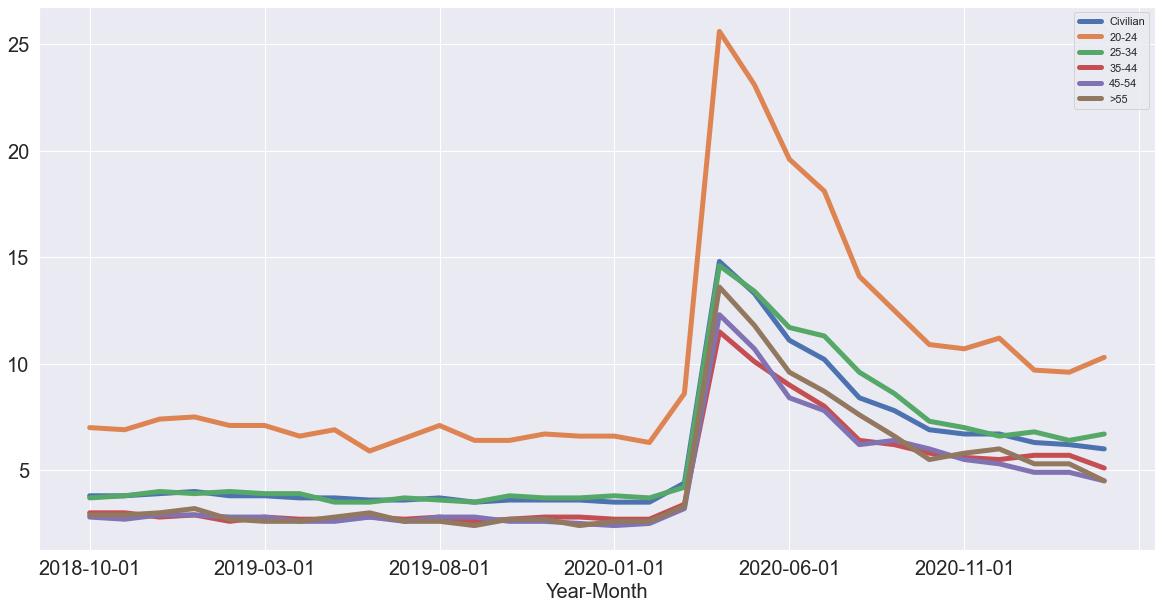

In [102]:
# Breaking down the unemployment rate by age:
COVID[['Civilian','20-24','25-34','35-44','45-54', '>55']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year-Month', fontsize=20)
plt.show()

Here we see the time series for age groups. The youngest age group (20-24) had the highest rate of unemployment (25.6%); this result is consistent with the historical record. However, they did sustain the biggest change in unemployment rate (increase from January 2020 to April 2020 of 19 percentage points). (The other age groups all had an increase in unemployment by approximately 9 percentage points.) The next highest rate of unemployment was in the 25-34 category (14.6%). Older people (>55) was the next group to file the most unemployment claims; people 35 and over have had the best recovery. 

### COVID Unemployment Rate:Breakdown by Highest Level of Education

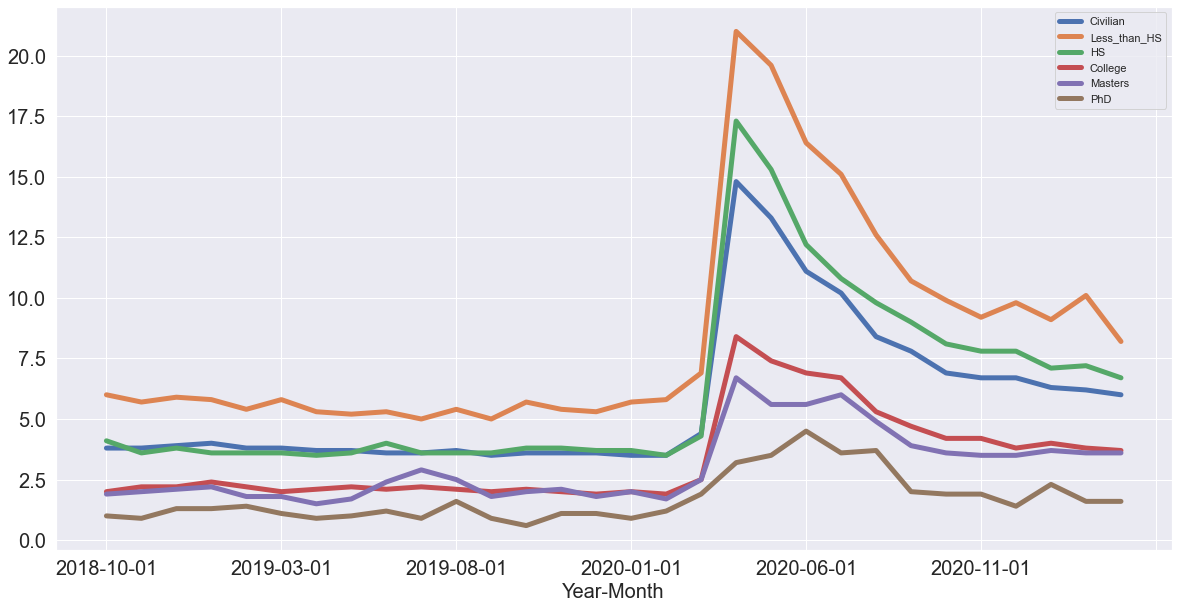

In [103]:
# Breaking down the unemployment rate by highest education level:
COVID[['Civilian','Less_than_HS','HS','College','Masters', 'PhD']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year-Month', fontsize=20)
plt.show()

Finally, we look at the relationship between highest education level attained and unemployment rate. Note that the level of education is for all workers of age 25 and above. Those with the highest amount of education experienced the least job loss during the pandemic. For those with a PhD or equivalent level of education, their work lives were effectively unchanged. They may have had to work at home, but they were still employed. This particular group also did not experience the sharp peak in unemployment; maximum unemployment (4.5%) occurred in June, two months after the peak for all other groups. In contrast, the greatest unemployment rates were for those with a high school diploma (17.3%) or no diploma (21%). Having attained at least a bachelor's degree distinguishes two main groups. 

## Observable Trends


It was observed that unemployment rates were highest for:

- Women

- People of Color

-Hispanics/Latinx had highest amount of loss


     -Blacks have slowest recovery
     -Whites and Asians have lowest rates of unemployment, one year later
     -Young people, followed by people > 55
     -People with a high school diploma (or less)

Unemployment rates were lowest for:

- Men
- Whites
- People between 34-55
- People with at least a bachelor’s degree
- Level of education attained segregates impact and recovery more than anything else